## GRIP :The Spark Foundation

### Data Science and Buisness Analytics - Task 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings
import warnings as wg

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin',low_memory=False)
df.head() 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
df.shape

(181691, 135)

In [5]:
df.columns.values 

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


In [8]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
for i in df.columns:
    print(i,len(df[i].unique()))

eventid 181691
iyear 47
imonth 13
iday 32
approxdate 2245
extended 2
resolution 1860
country 205
country_txt 205
region 12
region_txt 12
provstate 2856
city 36675
latitude 48323
longitude 48040
specificity 6
vicinity 3
location 44110
summary 112493
crit1 2
crit2 2
crit3 2
doubtterr 4
alternative 6
alternative_txt 6
multiple 3
success 2
suicide 2
attacktype1 9
attacktype1_txt 9
attacktype2 10
attacktype2_txt 10
attacktype3 9
attacktype3_txt 9
targtype1 22
targtype1_txt 22
targsubtype1 113
targsubtype1_txt 113
corp1 33239
target1 86007
natlty1 216
natlty1_txt 216
targtype2 23
targtype2_txt 23
targsubtype2 108
targsubtype2_txt 108
corp2 2692
target2 5044
natlty2 159
natlty2_txt 159
targtype3 21
targtype3_txt 21
targsubtype3 93
targsubtype3_txt 93
corp3 423
target3 721
natlty3 111
natlty3_txt 111
gname 3537
gsubname 1184
gname2 434
gsubname2 61
gname3 117
gsubname3 15
motive 14491
guncertain1 3
guncertain2 3
guncertain3 3
individual 2
nperps 114
nperpcap 51
claimed 4
claimmode 11
claimmode

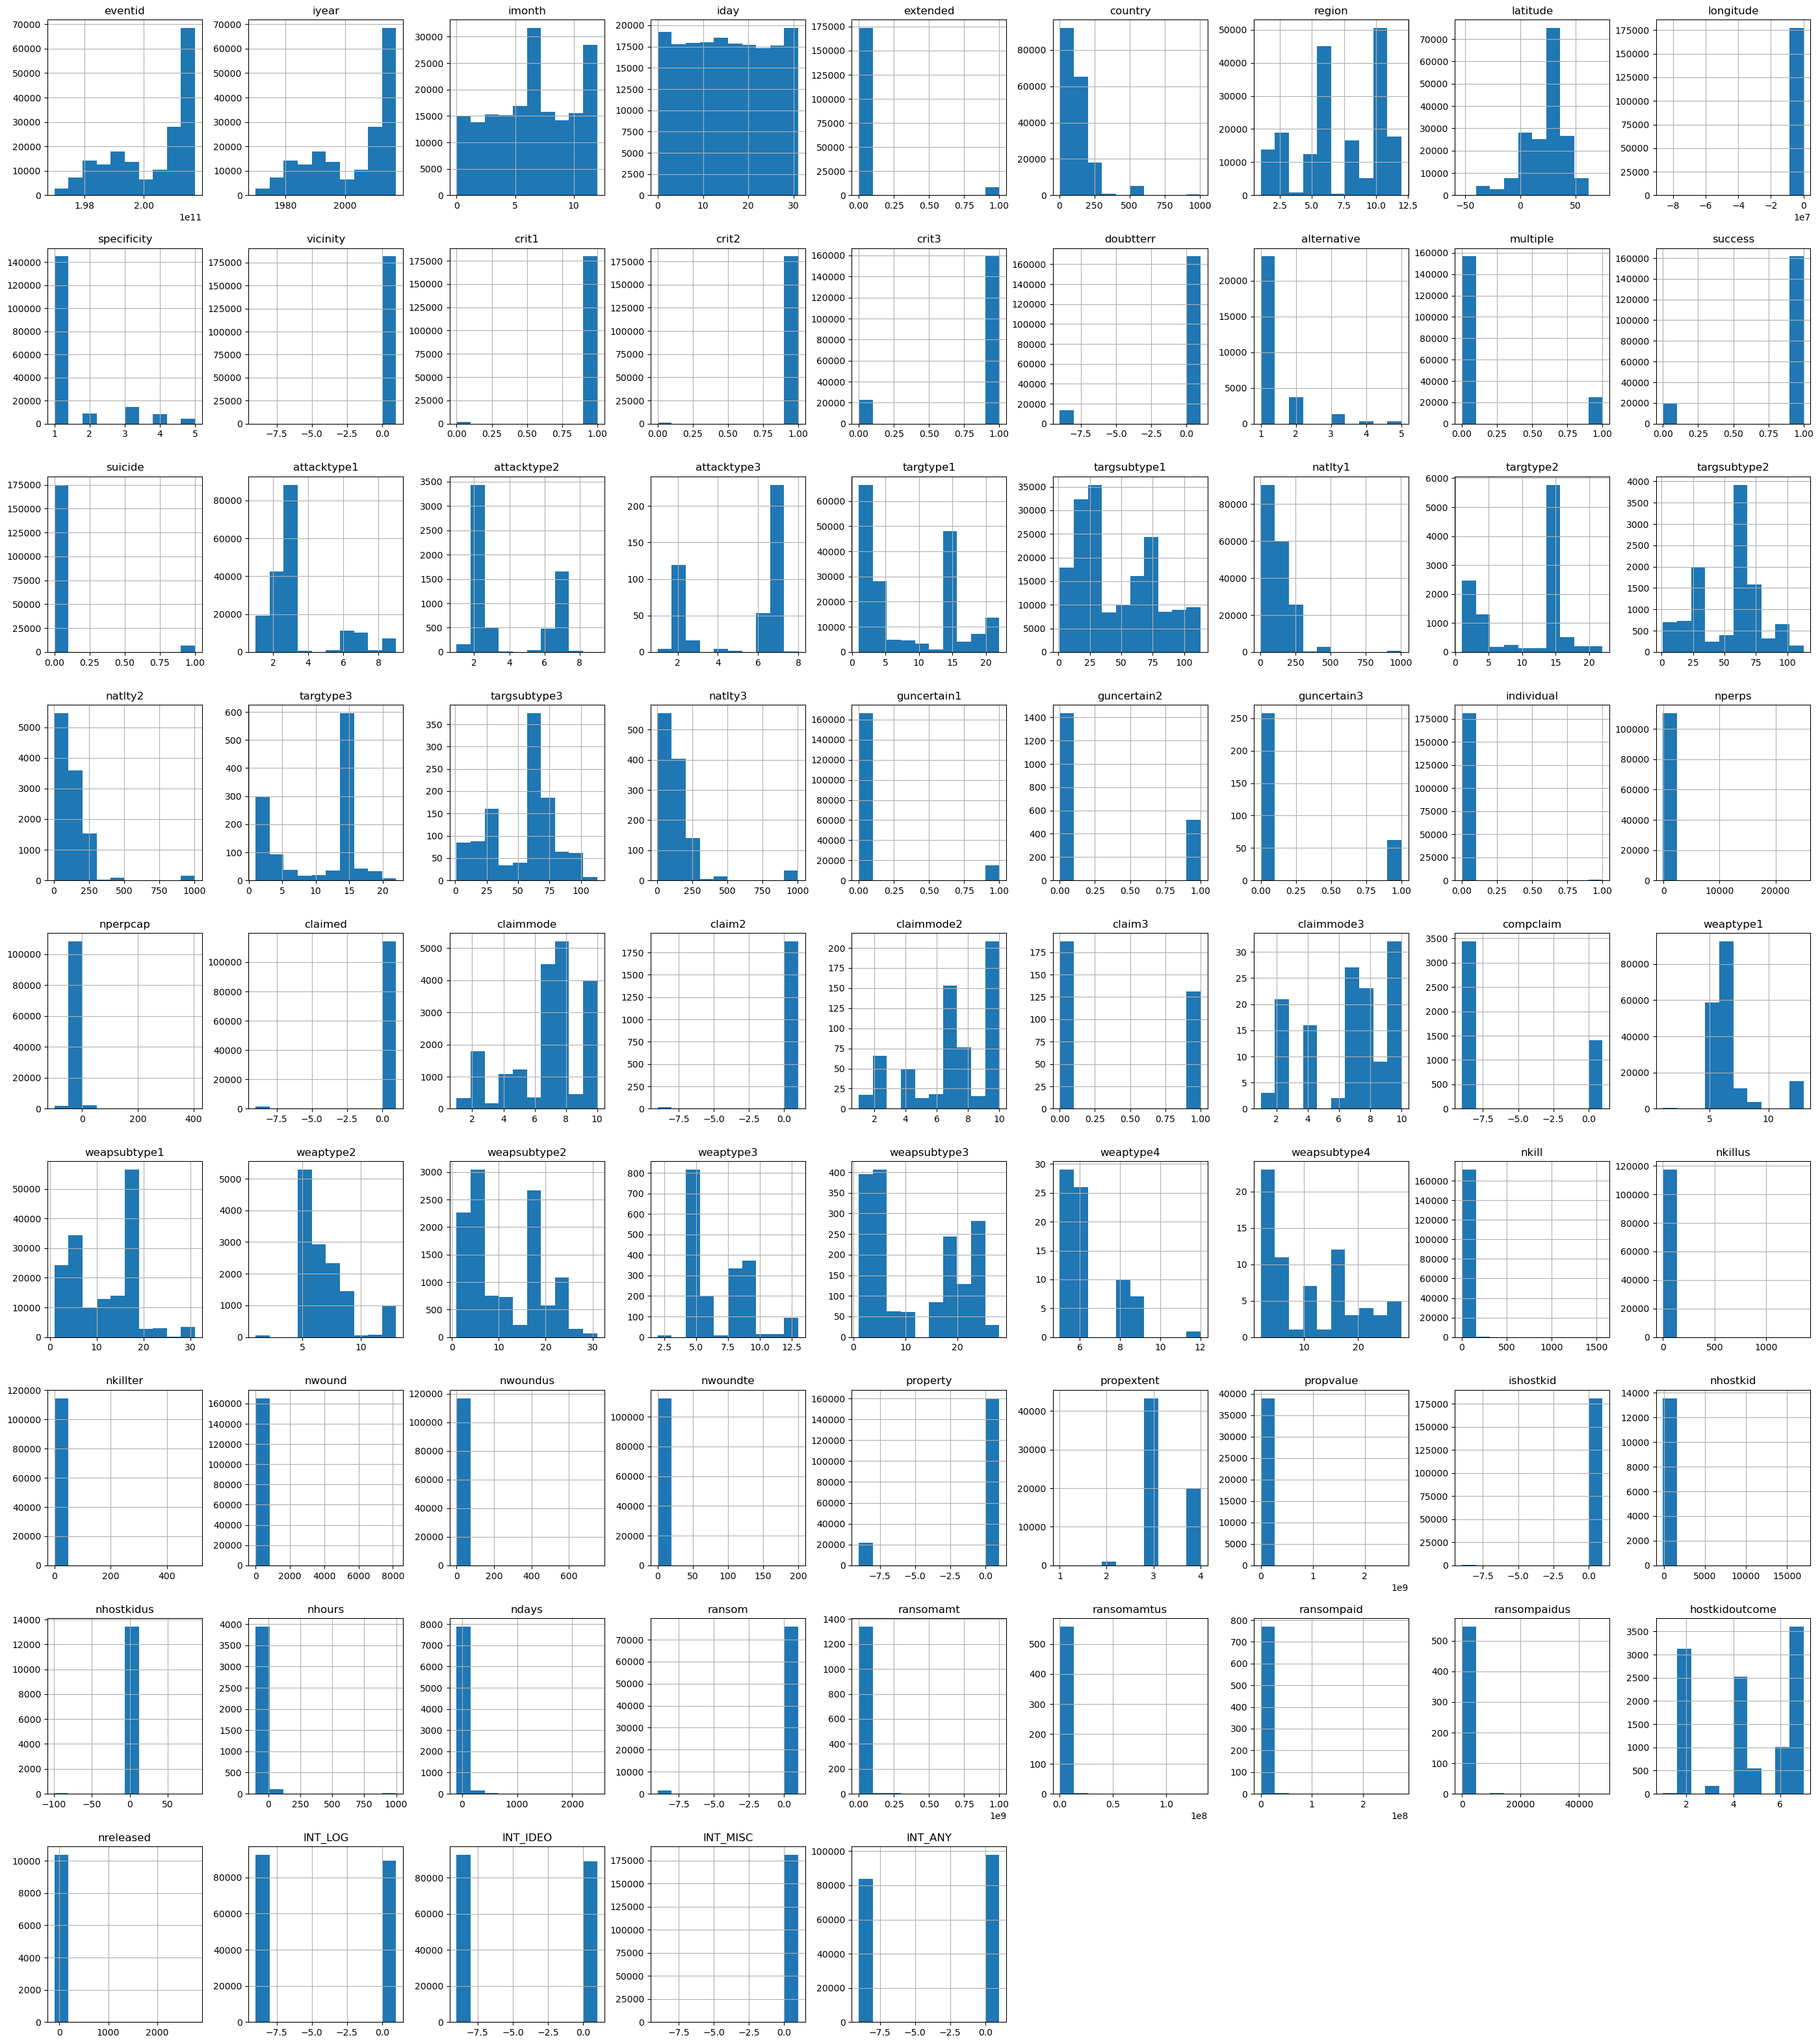

In [11]:
df.hist(figsize=(35,40))
plt.show()

Text(0.5, 1.0, 'Region-wise terrorist activity in each year ')

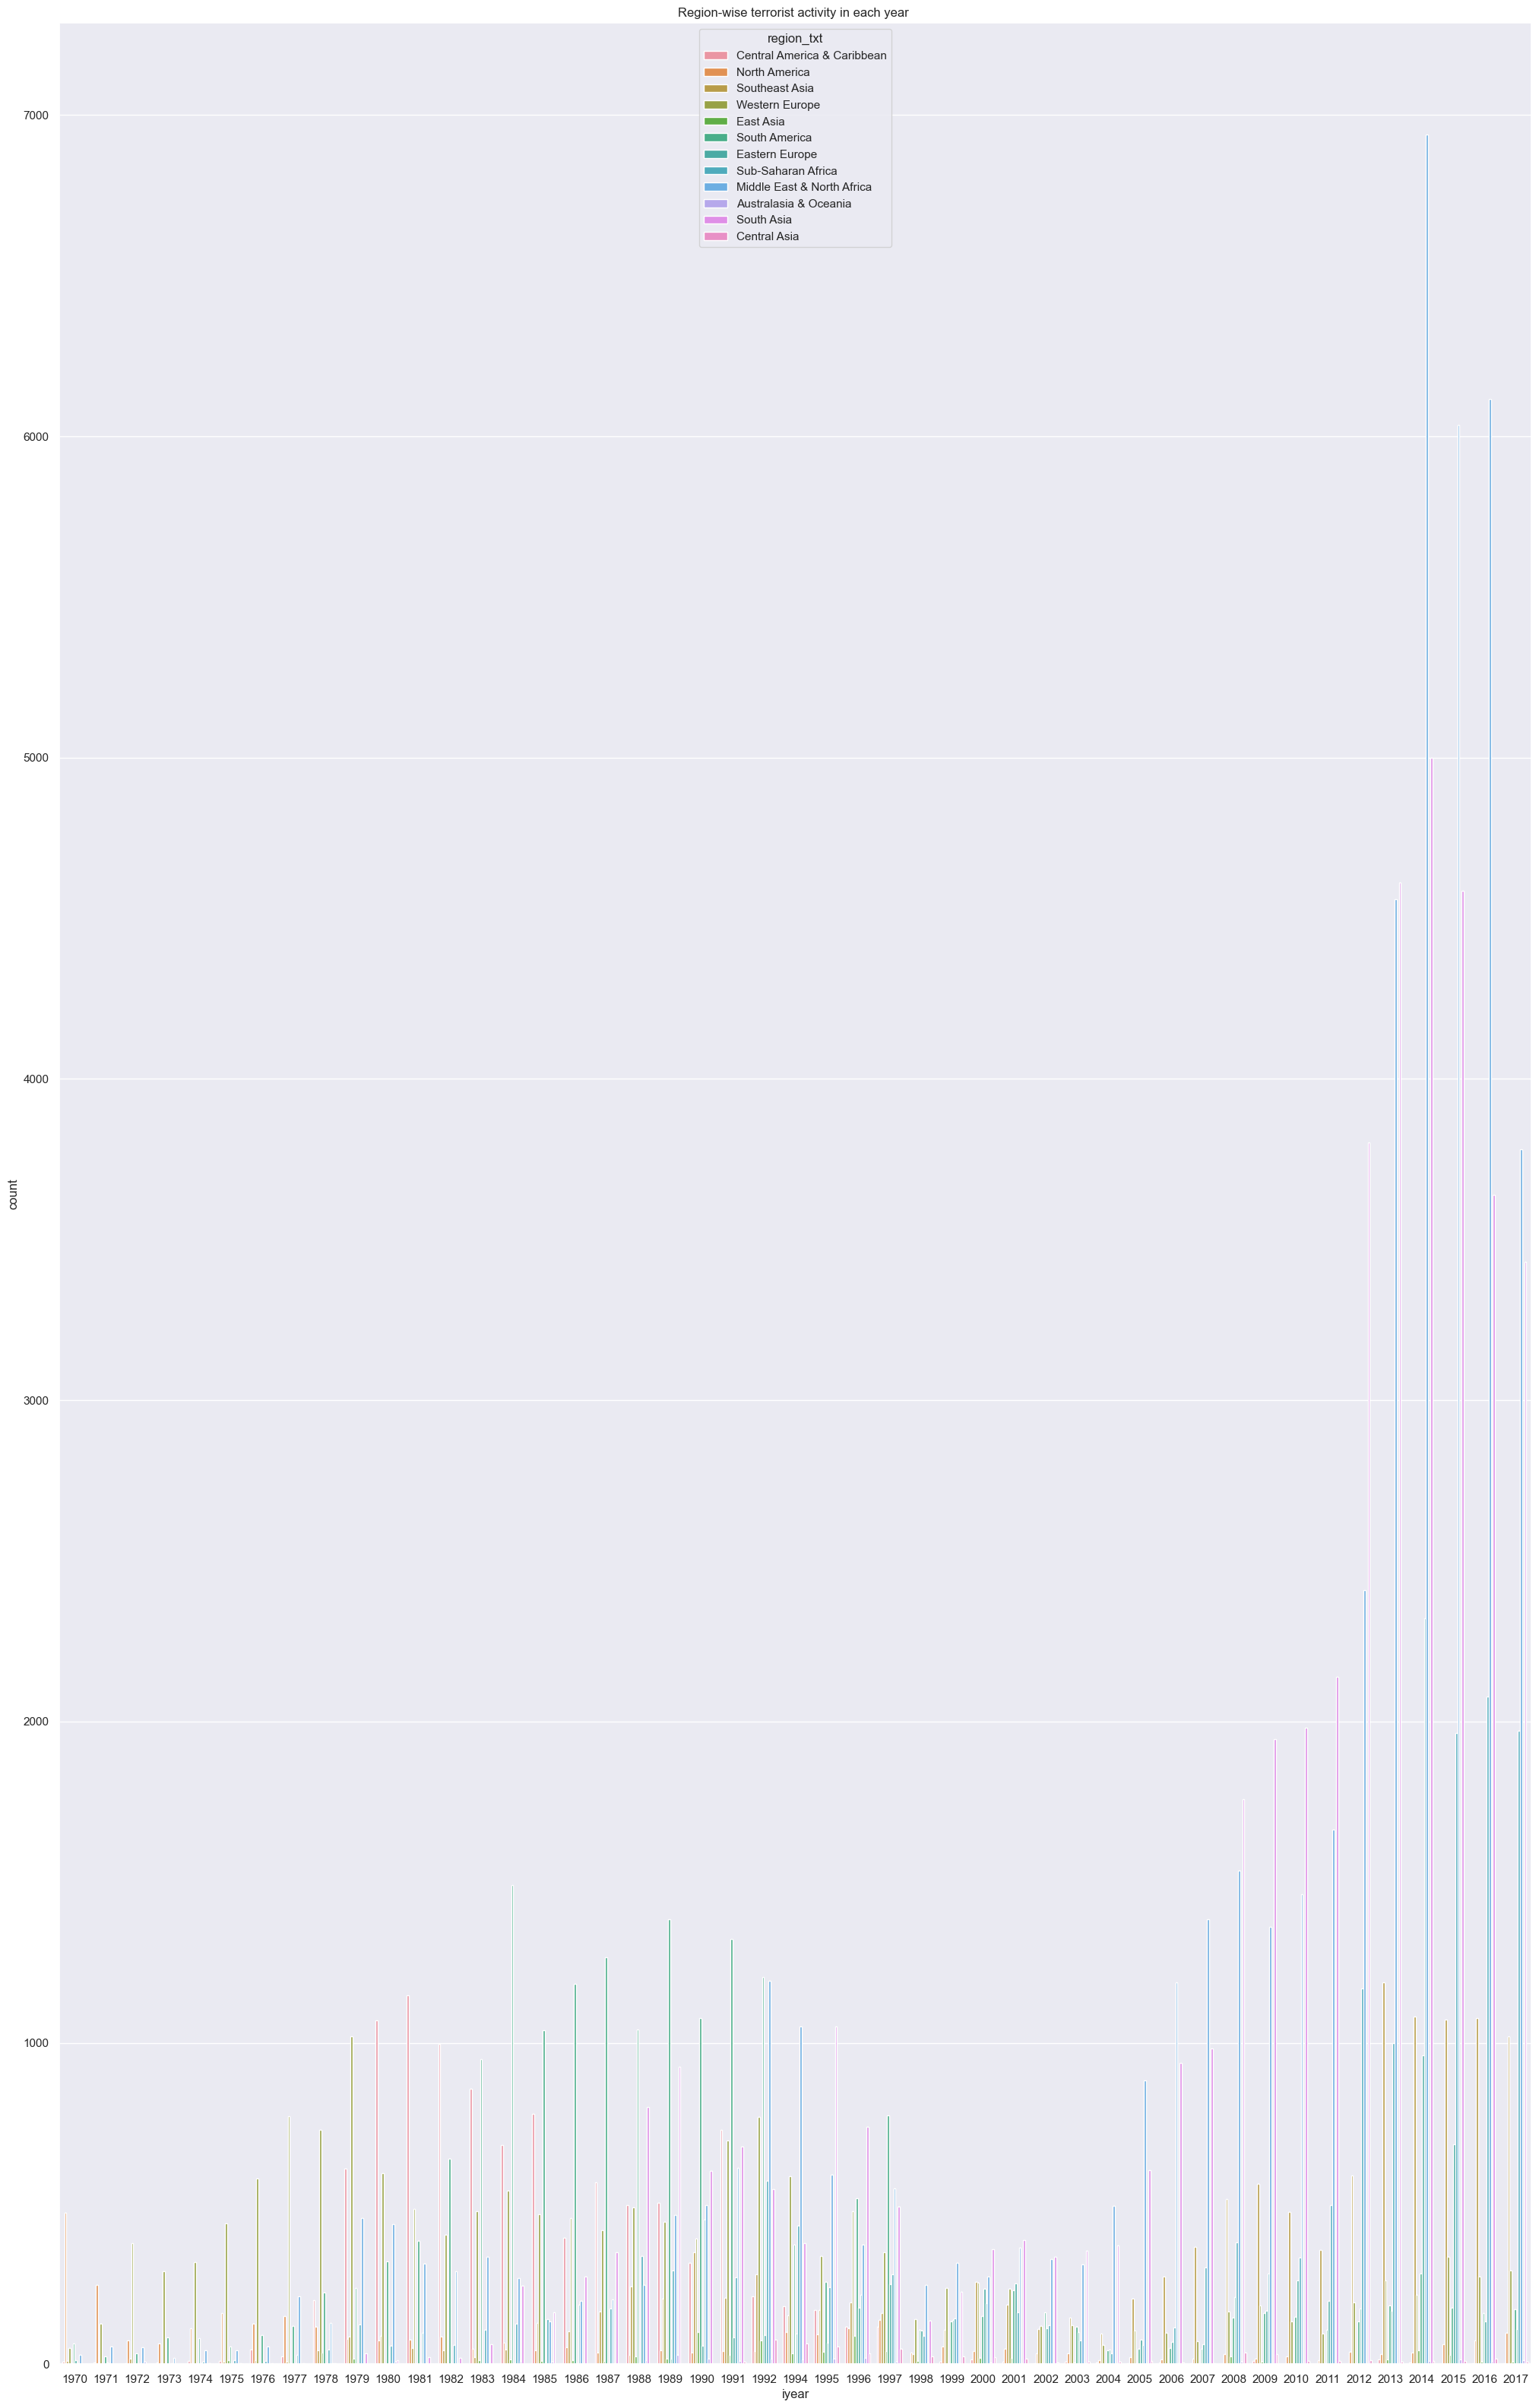

In [12]:
sns.set(rc={'figure.figsize':(25,40)})
sns.countplot(x=df['iyear'], hue=df['region_txt'])
plt.title('Region-wise terrorist activity in each year ')

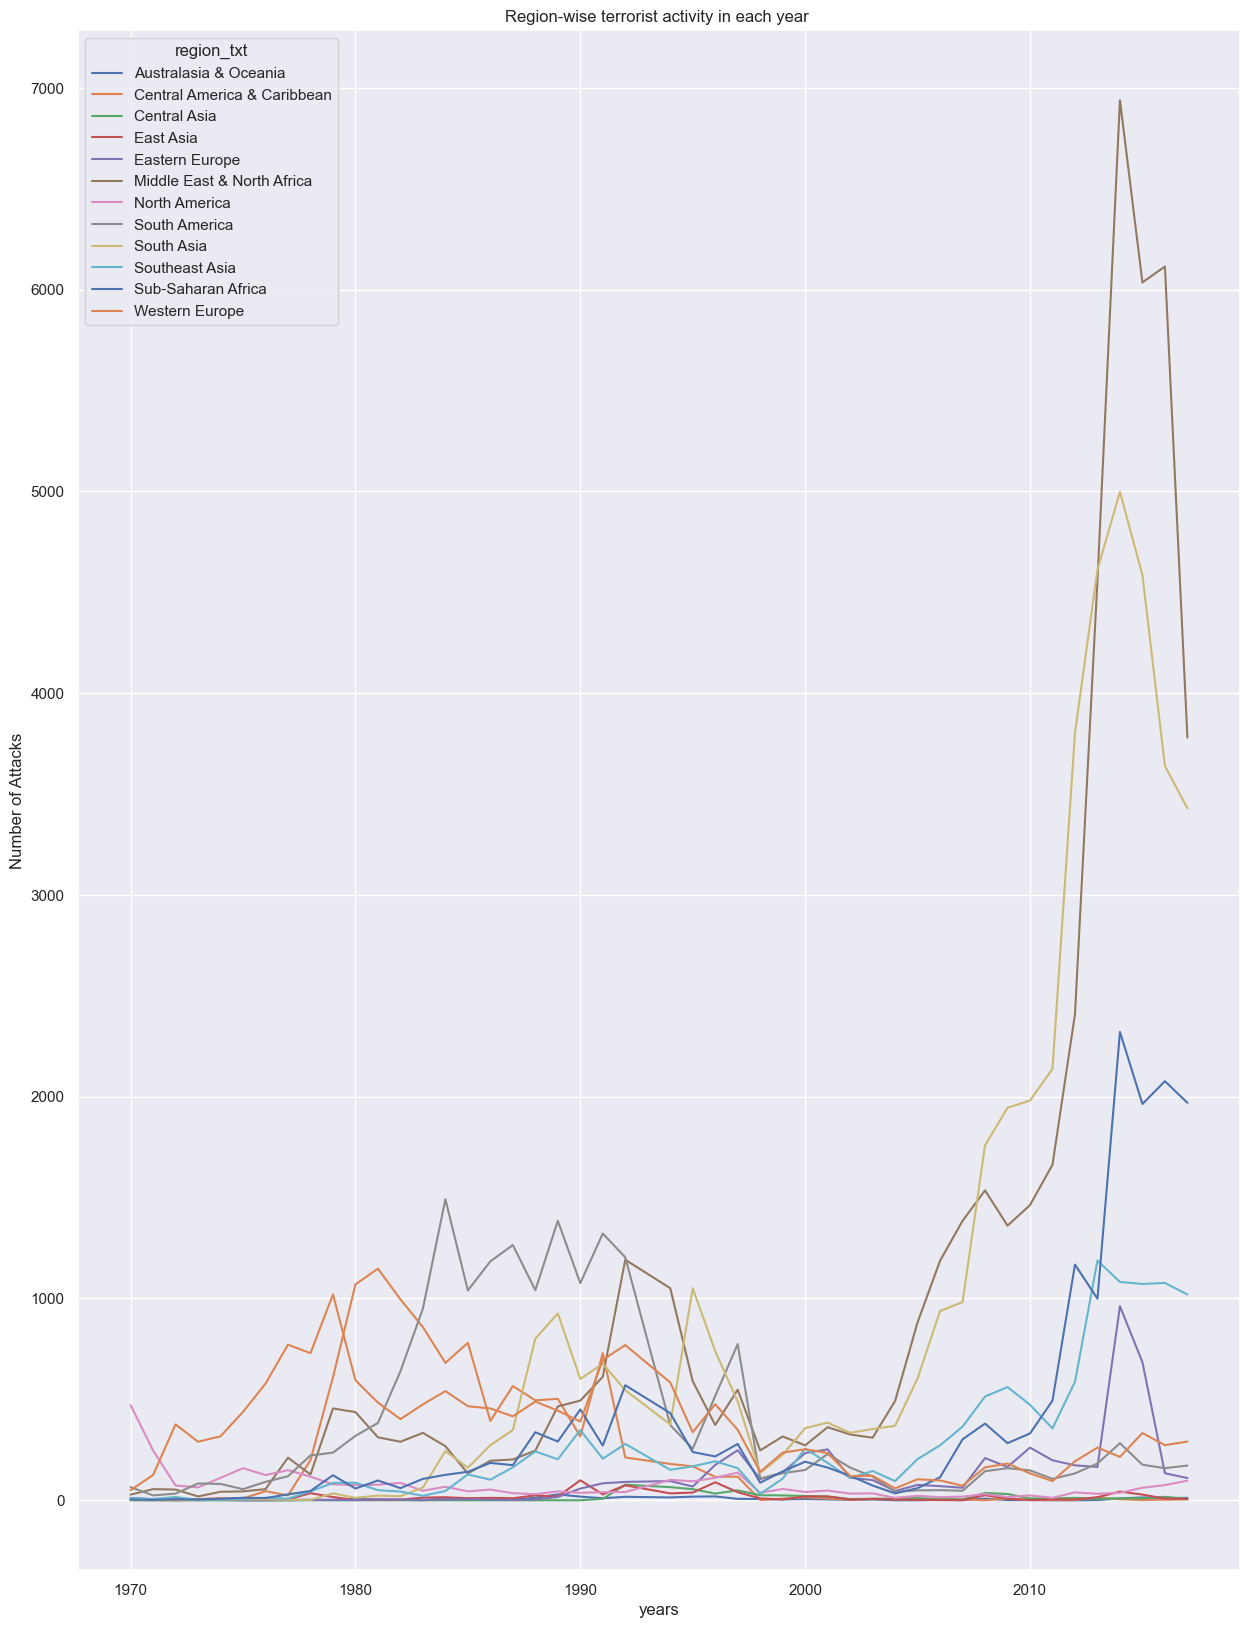

Middle east & North Africa has been reported to have more incidents


In [13]:
pd.crosstab(df['iyear'],df['region_txt']).plot(kind='line',figsize=(15,20))
plt.title('Region-wise terrorist activity in each year ')
plt.ylabel('Number of Attacks')
plt.xlabel('years')
plt.show()

print('Middle east & North Africa has been reported to have more incidents')

In [14]:
df['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

In [15]:
df['country_txt'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


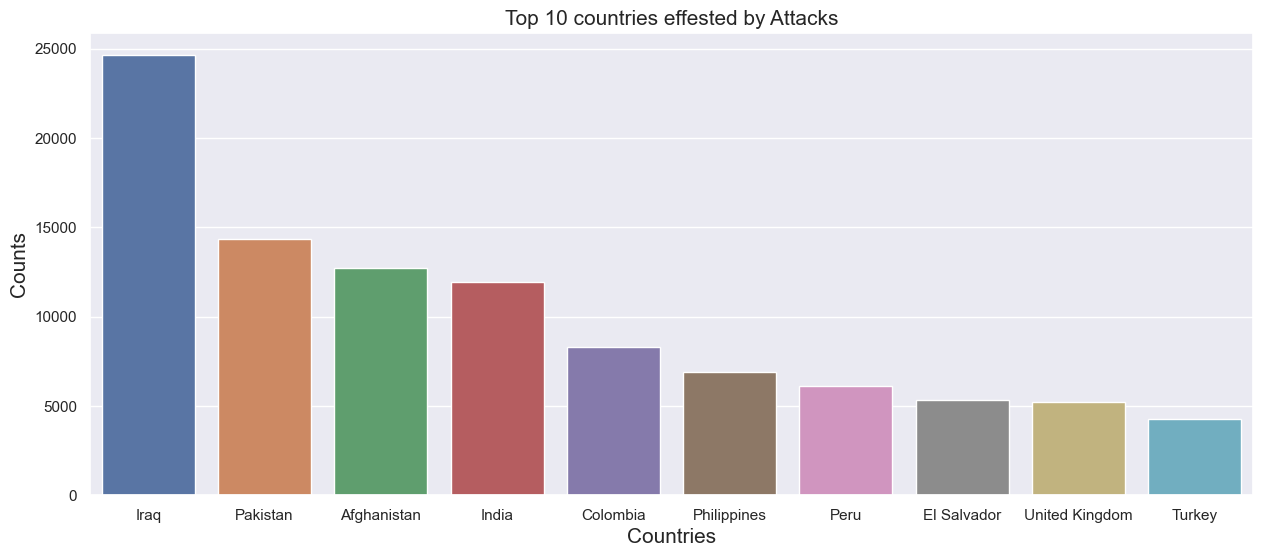

Most effected country is Iraq & mostly belongs to Asia continent


In [16]:
plt.figure(figsize=(15,6))
sns.barplot(df['country_txt'].value_counts()[:10].index,df['country_txt'].value_counts()[:10].values)
plt.title('Top 10 countries effested by Attacks',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xlabel('Countries',fontsize=15)
plt.show()

print('Most effected country is Iraq & mostly belongs to Asia continent')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


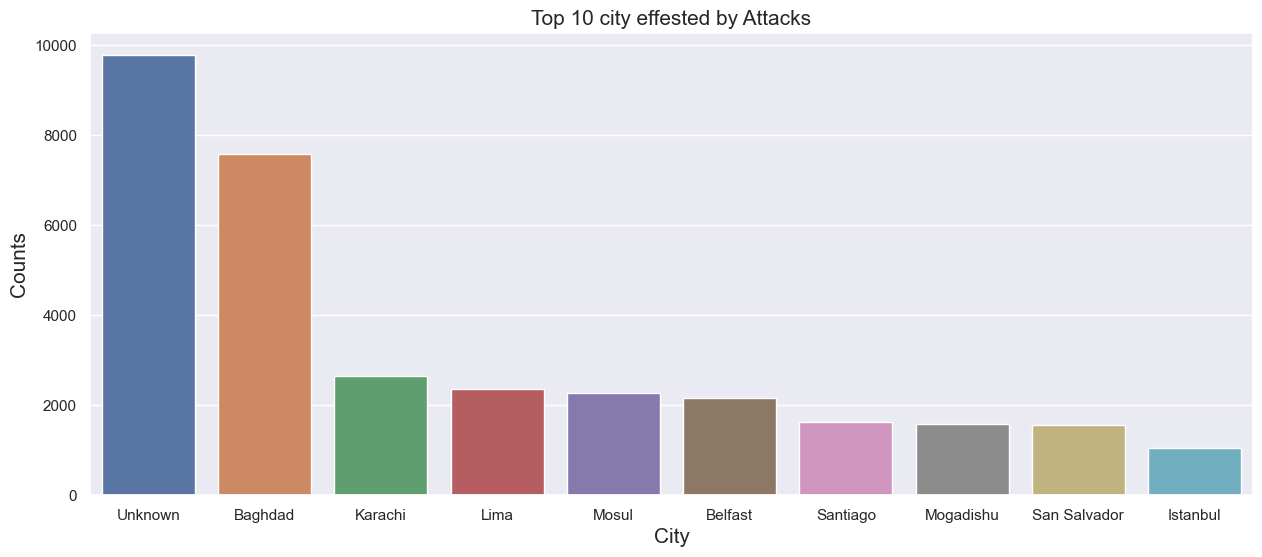

Most effected city is baghdad & unknown


In [17]:
plt.figure(figsize=(15,6))
sns.barplot(df['city'].value_counts()[:10].index,df['city'].value_counts()[:10].values)
plt.title('Top 10 city effested by Attacks',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.show()

print('Most effected city is baghdad & unknown')

Explosives, chemicals and Firearms are widely used as a weapon type


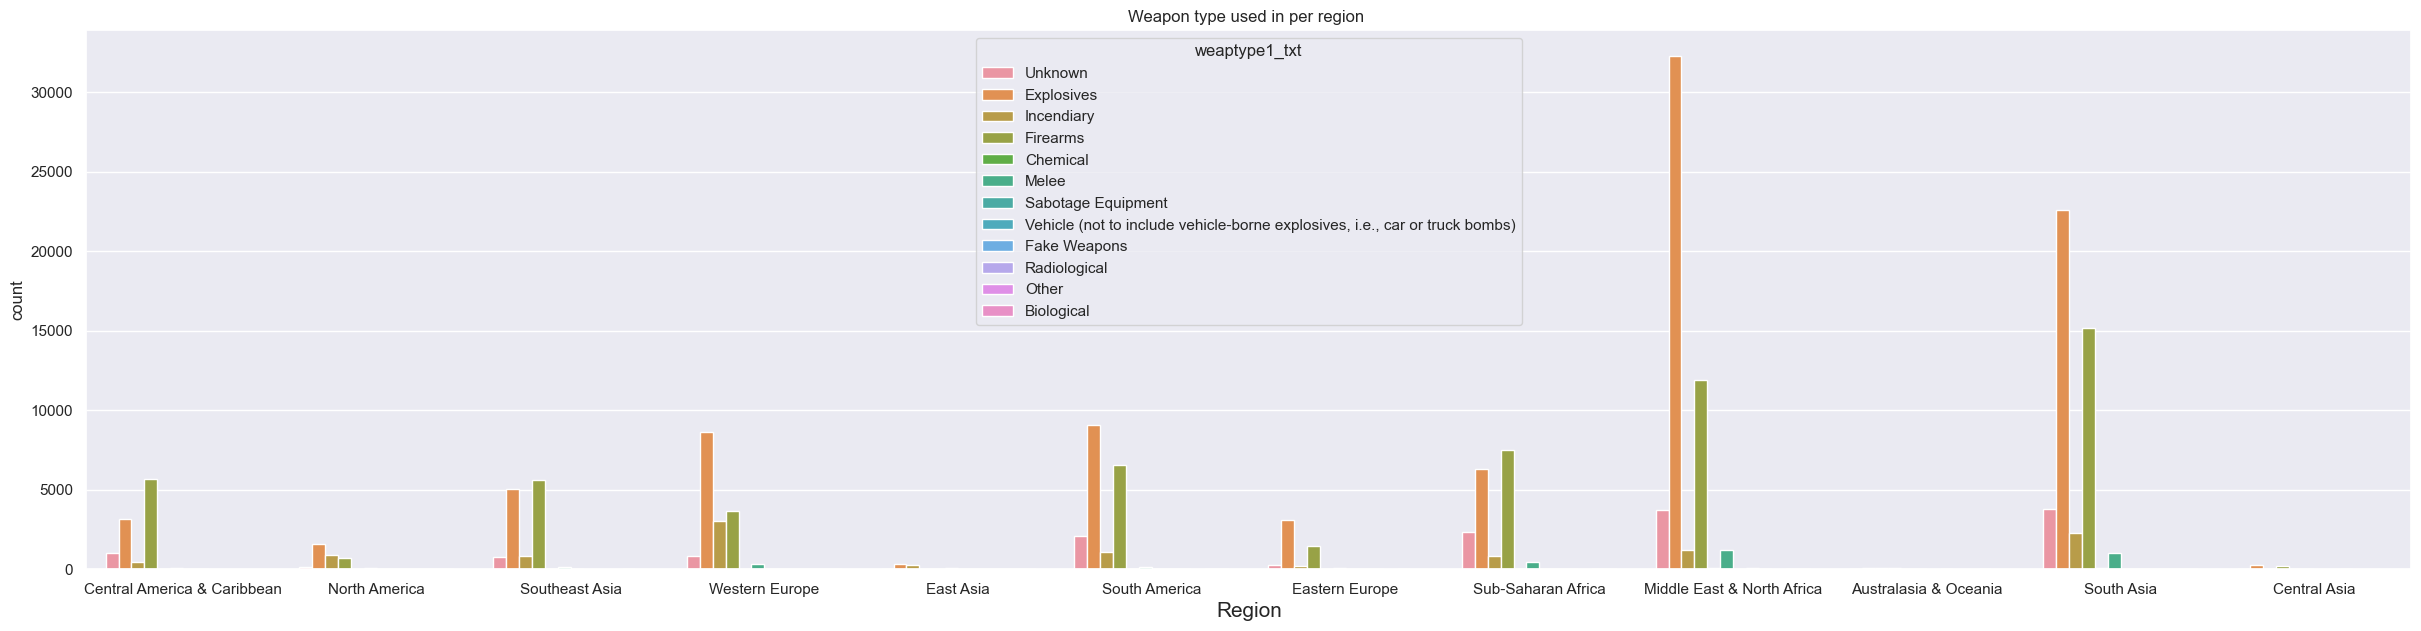

In [18]:
sns.set(rc={'figure.figsize':(30,7)})
sns.countplot(x=df['region_txt'], hue=df['weaptype1_txt'])
plt.title('Weapon type used in per region ')
plt.xlabel('Region',fontsize=15)
print('Explosives, chemicals and Firearms are widely used as a weapon type')

Bombing/Explosion is highly used attack type and region is Middle East/North Africa


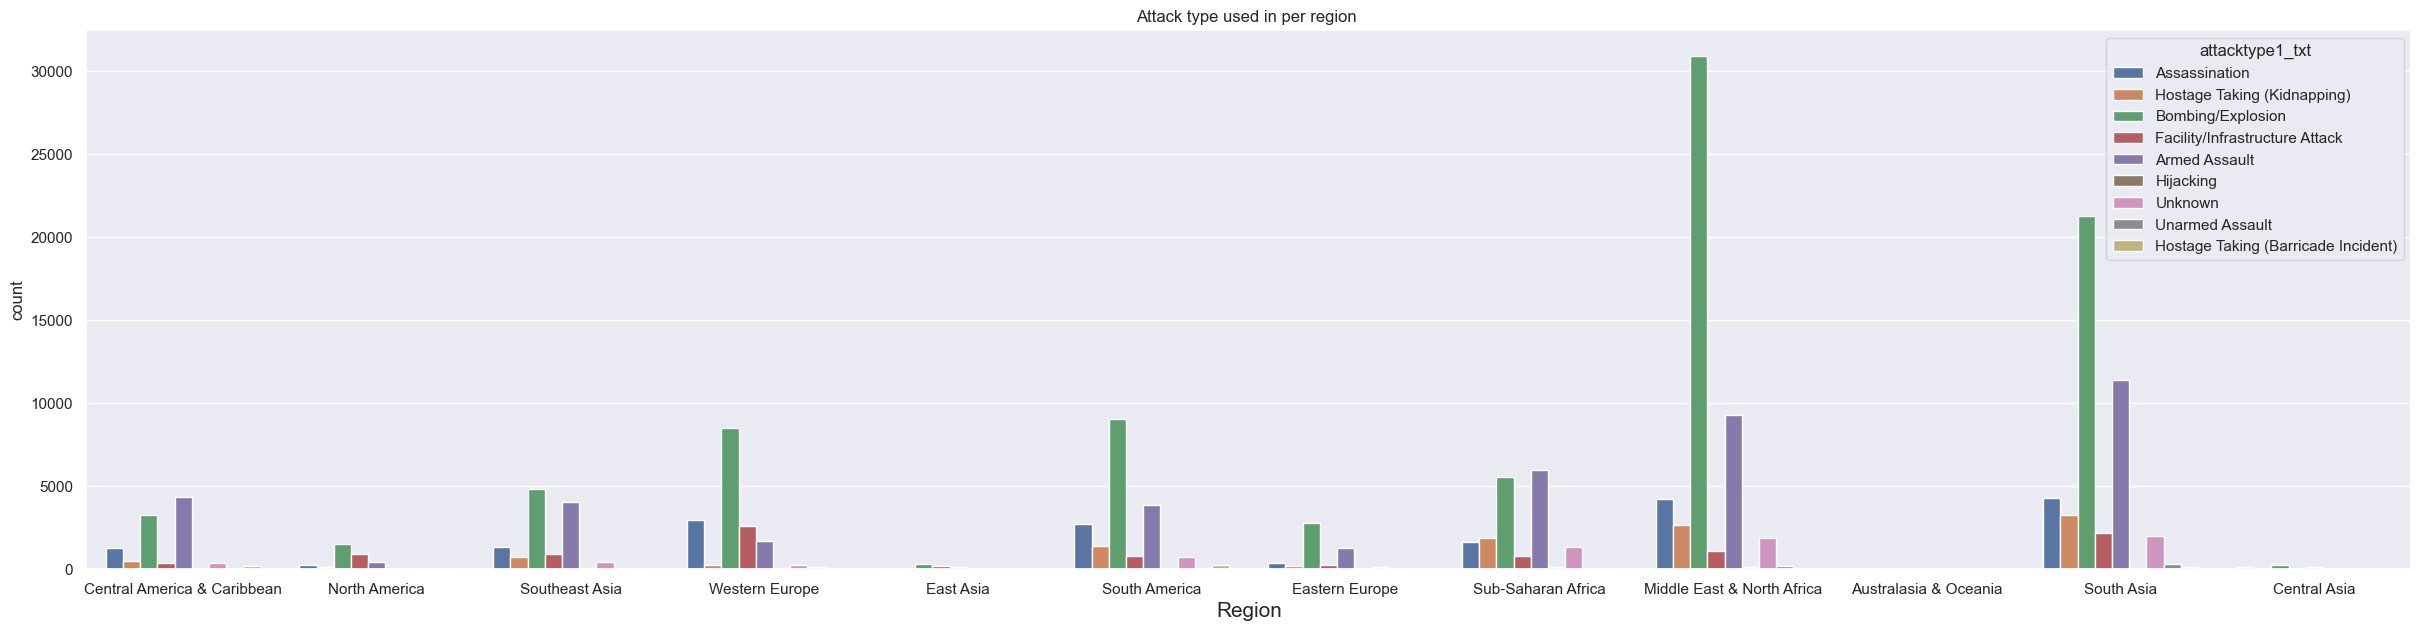

In [19]:
sns.set(rc={'figure.figsize':(30,7)})
sns.countplot(x=df['region_txt'], hue=df['attacktype1_txt'])
plt.title('Attack type used in per region ')
plt.xlabel('Region',fontsize=15)
print('Bombing/Explosion is highly used attack type and region is Middle East/North Africa')

Private Citizens/Property is the highly target type in each region


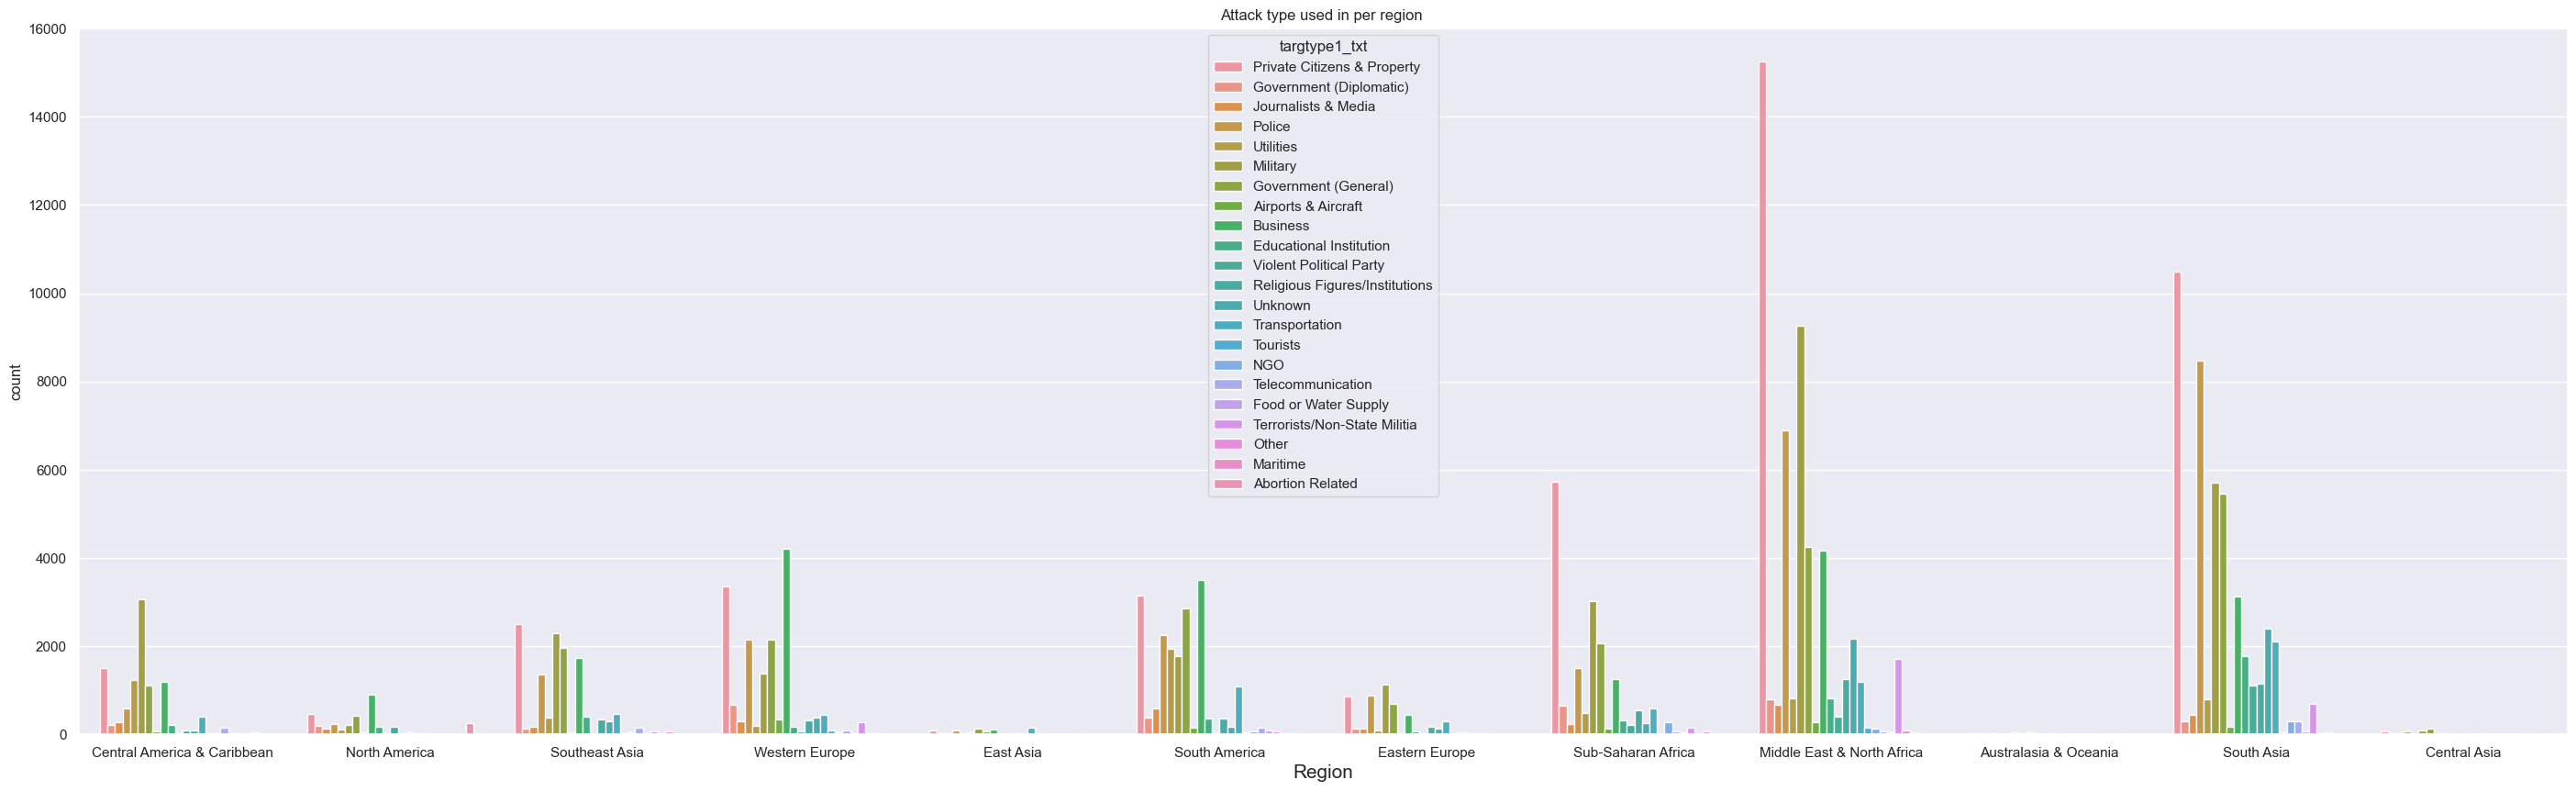

In [20]:
sns.set(rc={'figure.figsize':(35,10)})
sns.countplot(x=df['region_txt'], hue=df['targtype1_txt'])
plt.title('Attack type used in per region ')
plt.xlabel('Region',fontsize=15)
print('Private Citizens/Property is the highly target type in each region')

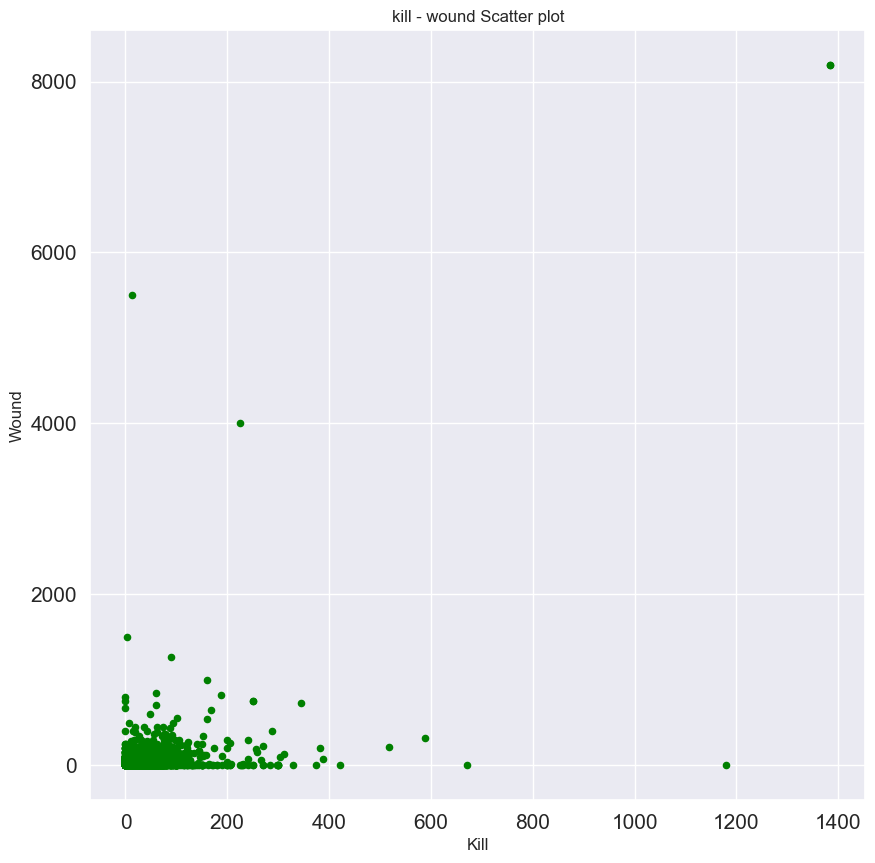

In [21]:
df.plot(kind='scatter',x='nkill',y='nwound',color='green',figsize=(10,10),fontsize=15)
plt.xlabel('Kill')
plt.ylabel('Wound')
plt.title('kill - wound Scatter plot')
plt.show()

In [22]:
# Now we are going to analysis the data of INDIA

new=df[df['country_txt']=='India']['city']
new.value_counts()

Srinagar          658
Unknown           624
Imphal            426
New Delhi         157
Amritsar          138
                 ... 
Bhagirath Para      1
Leimakhong          1
Halwara             1
Banka               1
Hungrum             1
Name: city, Length: 4798, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


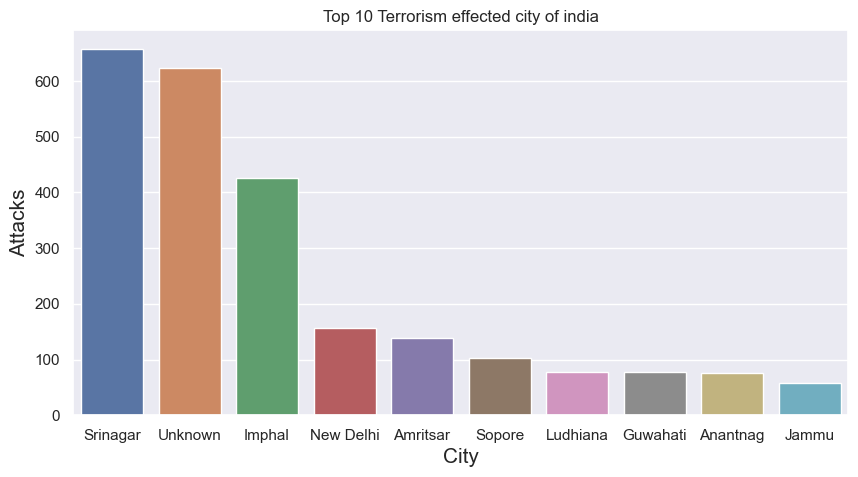

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(new.value_counts()[:10].index,new.value_counts()[:10].values)
plt.title('Top 10 Terrorism effected city of india')
plt.xlabel('City', fontsize=15)
plt.ylabel('Attacks', fontsize=15)
plt.show()

In [24]:
new=df[df['country_txt']=='India'][['city','iyear','attacktype1_txt','gname']]
new[:10]

,city,iyear,attacktype1_txt,gname
1186,New Delhi,1972,Hijacking,Palestinians
2764,Samastipur,1975,Bombing/Explosion,Ananda Marga
3857,New Delhi,1976,Bombing/Explosion,Unknown
5327,Bombay,1977,Hijacking,Japanese Red Army (JRA)
7337,Unknown,1979,Armed Assault,Naga People
7342,Imphal,1979,Assassination,Unknown
8174,Unknown,1979,Armed Assault,Meitei extremists
8685,Unknown,1979,Assassination,Mizo National Front
8831,Unknown,1979,Armed Assault,Mizo National Front
8836,Aizawl,1979,Facility/Infrastructure Attack,Mizo National Front


In [25]:
df['iyear'].value_counts()[:10]

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: iyear, dtype: int64

In [26]:
df['gname'].value_counts()[:10]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: gname, dtype: int64

In [27]:
new=df[df['country_txt']=='India']['iyear']
new.value_counts()

2016    1025
2017     966
2015     884
2014     860
2013     694
2009     672
2010     663
2011     645
2012     611
2008     534
1988     358
1990     349
1991     339
1989     324
1992     237
2001     234
1996     213
2003     196
1997     193
2002     184
2000     180
1995     179
2006     167
1987     166
1984     159
2007     149
2005     146
1999     112
2004     108
1994     107
1986      96
1998      61
1983      47
1985      39
1979      20
1981      16
1982      13
1980      10
1975       1
1977       1
1976       1
1972       1
Name: iyear, dtype: int64

In [28]:
new=df[df['country_txt']=='India']['attacktype1_txt']
new.value_counts()

Bombing/Explosion                      4825
Armed Assault                          3184
Assassination                          1229
Hostage Taking (Kidnapping)            1184
Facility/Infrastructure Attack          996
Unknown                                 312
Unarmed Assault                         143
Hostage Taking (Barricade Incident)      44
Hijacking                                43
Name: attacktype1_txt, dtype: int64